## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB , BernoulliNB , MultinomialNB
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier ,RandomForestRegressor , AdaBoostRegressor
from xgboost import XGBClassifier , XGBRegressor
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor , KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor , GradientBoostingClassifier
from sklearn.svm import SVC , SVR
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score , classification_report , accuracy_score , f1_score , precision_score
import pickle

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Read the CSV file into Pandas DataFrame

In [3]:
df = pd.read_csv('/content/Thyroid_Diff.csv')

# Summary

This notebook aims to predict the recurrence of well differentiated Thyroid cancer.

**If this notebook is helpful for you, please consider upvoting 🙏**

What is Thyroid cancer?

**Definition:** *Thyroid cancer is a type of malignancy that originates in the thyroid gland, a small butterfly-shaped gland located at the base of the neck. This cancer can present in various forms, including papillary, follicular, medullary, and anaplastic thyroid cancer, each with distinct characteristics and levels of aggressiveness. Papillary thyroid cancer is the most common and typically has a favorable prognosis. Symptoms of thyroid cancer may include a lump in the neck, trouble swallowing, hoarseness, and swollen lymph nodes. Risk factors encompass exposure to radiation, a family history of thyroid cancer, and certain genetic conditions. Treatment often involves a combination of surgery, radioactive iodine therapy, and, in some cases, thyroid hormone therapy or targeted drug therapy. Early detection and advances in treatment have significantly improved the prognosis for most thyroid cancer patients.*

Work like this serves to increase the chances of early detection of recurrence. It is important for patients to understand the likelihood of recurrence so they can adjust their lifestyle and follow-up with their healthcare provider accordingly.

**Some information about the dataset:**

Dataset Characteristics: Tabular\
Feature Type: Real, Categorical, Integer\
Features: 16\
Associated Tasks: Classification

**Variables:**
* Age: Feature, Integer
* Gender: Feature, Categorical
* Smoking: Feature, Categorical
* Hx Smoking: Feature, Categorical
* Hx Radiothreapy: Feature, Categorical
* Thyroid Function: Feature, Categorical
* Physical Examination: Feature, Categorical
* Adenopathy: Feature, Categorical
* Pathology: Feature, Categorical
* Focality: Feature, Categorical
* Risk: Feature, Categorical
* T: Feature, Categorical
* N: Feature, Categorical
* M: Feature, Categorical
* Stage: Feature, Categorical
* Response: Feature, Categorical

**Target Variable:**
* Recurred: Target, Categorical.

# 1. Exploratory Data Analysis

## 1.1 Datatypes and a Cursory glance at Data

I want to confirm what the dataset provider asserts regarding the variables:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

This seems to match up with what the dataset summary asserts: There is 1 numerical feature and the rest are categorical. There are no null values in the dataset to address in the pre-processing stage. It looks like a relatively small dataset (383 entries) and also a clean dataset (no null). This is a good starting block for exploratory data analysis.

I'll take a look at the first and last 5 rows of the dataset before proceeding.

In [5]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [6]:
df.tail()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes
382,67,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


I get a pretty good idea of the dataset from examining these 10 rows. Aside from age, all of the features that predict the target variable are categorical as we confirmed earlier, and the target variable is a yes/no categorical variable.

I'll separate the dataset into numerical (age) and categorical features which I may reference later during feature engineering.

## 1.2 Categorical Features Preprocessing

In [7]:
# find categorical and numerical variables
columns = list(df.columns)

categoric_columns = []
numeric_columns = []

for i in columns:
    if len(df[i].unique()) > 8:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)

categoric_columns = categoric_columns[:-1] # Excluding target:'Recurred'

In [8]:
print('Numeric columns: ',numeric_columns)
print('Categoric columns: ',categoric_columns)

Numeric columns:  ['Age']
Categoric columns:  ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']


I want to know how many variables there are in my categorical columns so I can determine whether to use a label encoder or one-hot encoding for my features:

In [9]:
print(df.nunique())

Age                     65
Gender                   2
Smoking                  2
Hx Smoking               2
Hx Radiothreapy          2
Thyroid Function         5
Physical Examination     5
Adenopathy               6
Pathology                4
Focality                 2
Risk                     3
T                        7
N                        3
M                        2
Stage                    5
Response                 4
Recurred                 2
dtype: int64


I can see that the feature with the most number of unique variables is 'T' with 7. I'll try label encoding for this dataset and if I run into any trouble I'll pivot to one-hot encoding for the features with the most unique variables.

# 2. Feature Engineering

## 2.1 Split the Dataset into Train and Test Sets

There is only 1 numerical variable, so we need to encode the categorical variables before we can proceed towards building any type of machine learning model. Before I do that, I need to separate the target variable from the dataset and split the dataset into training and testing sets.

In [10]:
# Assign X and y to predictors and target variable

X = df.drop('Recurred', axis=1)
y = df[['Recurred']]

print(X.shape)
print(y.shape)

(383, 16)
(383, 1)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [12]:
X.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent


In [13]:
y.head()

,Recurred
0,No
1,No
2,No
3,No
4,No


In [14]:
X_train.shape

(268, 16)

In [15]:
y_train.shape

(268, 1)

The shape of my training sets matches, this is a sign that the split went correclty and I can proceed to feature scaling.

## 2.2 Feature Scaling

I'll use a standard scaler on the numerical column (age) before I encode the categorical columns

In [16]:
Standard_Scaler = StandardScaler()
X_train[numeric_columns] = Standard_Scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = Standard_Scaler.transform(X_test[numeric_columns])

In [17]:
X_train

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
335,-0.796292,M,No,No,No,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,I,Structural Incomplete
140,-0.861915,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent
132,-0.599423,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent
253,-0.205684,F,No,No,No,Euthyroid,Multinodular goiter,No,Follicular,Multi-Focal,Low,T3a,N0,M0,I,Biochemical Incomplete
153,1.434892,F,No,No,No,Euthyroid,Normal,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Biochemical Incomplete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.828631,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent
106,-0.993161,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent
270,-0.140061,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T3a,N0,M0,I,Indeterminate
348,1.106777,F,No,No,No,Subclinical Hypothyroidism,Multinodular goiter,Extensive,Papillary,Multi-Focal,Intermediate,T3b,N1b,M0,II,Structural Incomplete


## 2.3 Encoding Categorical Features

I need to encode the categorical features before I compare classification models. I'll use Label Encoder to do this, although I think on this dataset One-Hot Encoding is totally suitable as well.

In [ ]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)#we use labelencoder to convert categorical data to numeric value
object_columns = X_train.select_dtypes(include=['object']).columns
for column in object_columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])#we use labelencoder to convert categorical data to numeric value

y_test = label_encoder.fit_transform(y_test)#we use labelencoder to convert categorical data to numeric value
object_columns = X_test.select_dtypes(include=['object']).columns
for column in object_columns:
    X_test[column] = label_encoder.fit_transform(X_test[column])#we use labelencoder to convert categorical data to numeric value

In [ ]:
X_train.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
335,-0.796292,1,0,0,0,2,1,1,3,0,1,3,2,0,0,3
140,-0.861915,0,0,0,0,2,1,3,3,1,2,2,0,0,0,1
132,-0.599423,0,0,0,0,2,4,3,3,1,2,2,0,0,0,1
253,-0.205684,0,0,0,0,2,1,3,0,0,2,3,0,0,0,0
153,1.434892,0,0,0,0,2,2,3,3,1,2,2,0,0,0,0


The data is encoded correctly. We can see this above, all of the object datatypes have been converted to int.

In [ ]:
X_train.shape

(268, 16)

In [ ]:
y_train.shape

(268,)

## 2.4 Feature Importance

I want to know what features are most important for predicting the target variable in this dataset. There are two ways to approach this, and I'll apply both to get the full picture: Feature Importance scores as well as Permutation Importance.

In [ ]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Response                0.399827
Risk                    0.175691
N                       0.093147
T                       0.075028
Age                     0.071489
Adenopathy              0.039452
Stage                   0.038854
Physical Examination    0.025624
Gender                  0.023471
Focality                0.016674
Thyroid Function        0.012287
Pathology               0.011760
Smoking                 0.008643
Hx Smoking              0.004103
M                       0.003722
Hx Radiothreapy         0.000228
dtype: float64

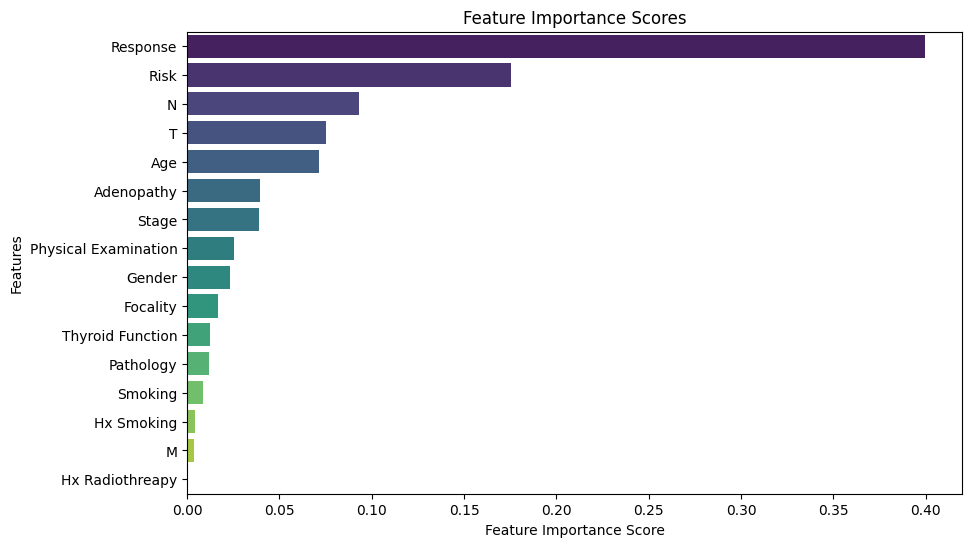

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_scores.values, y=feature_scores.index, palette="viridis")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Scores')
plt.show()

Above we see the feature importance scores plotted in a bar chart. Response is the most important feature, by far, for predicting the recurrence of thyroid cancer.

## 2.4 Permutation Importance

In [ ]:
from sklearn.inspection import permutation_importance

# Determine permutation importance
perm_importance = permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=0)

# Create a DataFrame for permutation importances
perm_importances = pd.DataFrame(perm_importance.importances, index=X_test.columns).T

# Convert permutation importance results into a DataFrame
perm_importance_df = pd.DataFrame(perm_importance.importances_mean, index=X_test.columns, columns=['Importance'])
perm_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

print("\nPermutation Importances:")
print(perm_importance_df)


Permutation Importances:
                        Importance
Response              2.710145e-01
Risk                  1.304348e-02
N                     8.985507e-03
Stage                 8.405797e-03
Age                   6.666667e-03
T                     3.768116e-03
Focality              3.478261e-03
Adenopathy            2.898551e-03
Physical Examination  2.608696e-03
Gender                1.480297e-17
Smoking               0.000000e+00
Hx Smoking            0.000000e+00
Hx Radiothreapy       0.000000e+00
Pathology             0.000000e+00
M                     0.000000e+00
Thyroid Function     -1.449275e-03


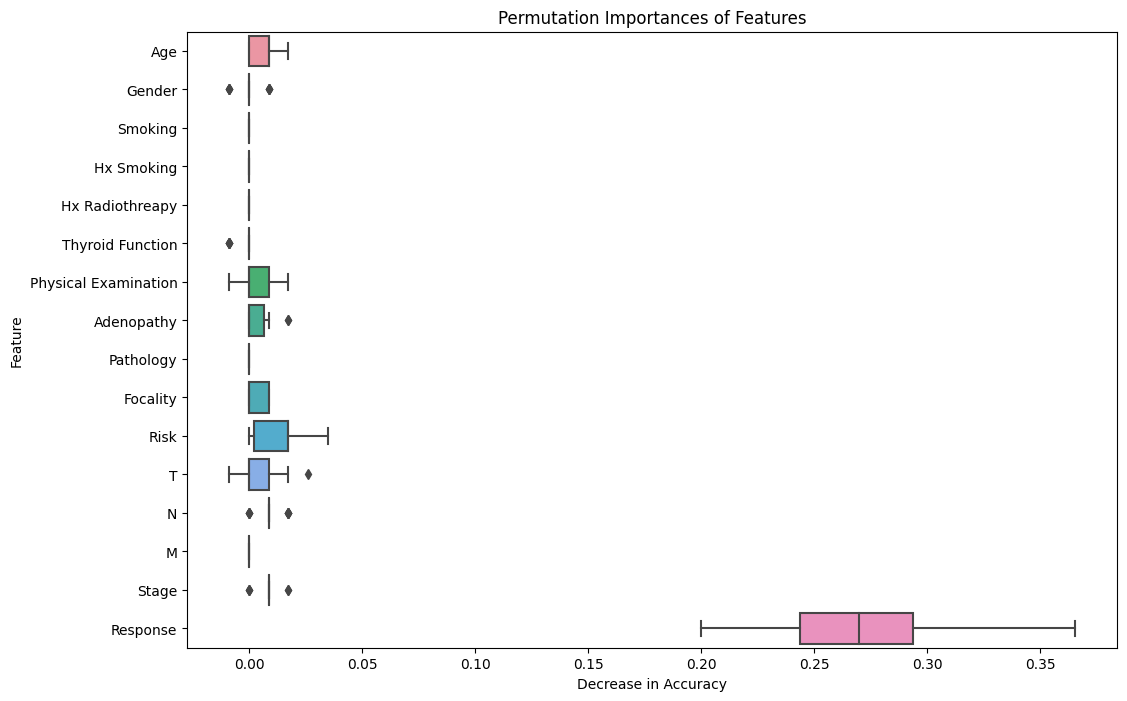

In [ ]:
# Plotting the permutation importance using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=perm_importances, orient='h')
plt.title('Permutation Importances of Features')
plt.xlabel('Decrease in Accuracy')
plt.ylabel('Feature')
plt.show()

Response has the greatest effect on accuracy, and is by far the most relevant feature in terms of permutation importance.

# 3. Building and Evaluating a Model

## 3.1 Selecting a Classification Model

I'm going to create an empty list model_scores and use a for loop to cycle through 8 popular classification models using similar parameters, and then I will determine the best model depending on the Accuracy, F1 Score, and Precision. Shoutout to @abdmental01 for sharing this technique!

In [ ]:
# # Create a dictionaries of list of models to evaluate performance with hyperparameters
models = {
          'LogicRegression' : (LogisticRegression(), {}),
          'SVC' : (SVC(), {'kernel': ['rbf', 'poly', 'sigmoid']}),
          'DecisionTreeClassifier' : (DecisionTreeClassifier(random_state=42), {'max_depth': [None, 5, 10],'random_state': [42]}),
          'RandomForestClassifier' : (RandomForestClassifier(random_state=42), {'n_estimators': [10, 100],'random_state': [42],'max_depth': [None, 5, 10]}),
          'KNeighborsClassifier' : (KNeighborsClassifier(), {'n_neighbors': np.arange(3, 100, 2),}),
          'GradientBoostingClassifier' : (GradientBoostingClassifier(random_state=42),{'n_estimators': [10, 100],'random_state': [42]}),
          'XGBClassifier' : (XGBClassifier(), {'n_estimators': [10, 100]}),
          'AdaBoostClassifier': (AdaBoostClassifier(random_state=42), {'n_estimators': [10, 100],'random_state': [42]}),
          }

# train and predict each model with evaluation metrics as well making a for loop to iterate over the models
model_scores = []
for name, (model, params) in models.items():
    # create a pipline
    pipeline =RandomizedSearchCV(model, params, cv=5)

    # fit the pipeline
    pipeline.fit(X_train, y_train)

    # make prediction from each model
    y_pred = pipeline.predict(X_test)
    # Metric
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred,average='macro')
    precision = precision_score(y_test, y_pred,average='macro')
    best_parameter = pipeline.best_params_
    # Append these in the model_scores
    model_scores.append((name,accuracy , f1 , precision,best_parameter))

# selecting the best model from all above models with evaluation metrics sorting method
sorted_models = sorted(model_scores, key=lambda x: x[1])

# Printing Each model with evaluation metrics
print('Accuracy Of Models')
for model in sorted_models:
    print('Accuracy_score for', f"{model[0]} is {model[1]: .2f}")
print('\n')
print('F1 Score Of Models')
for model in sorted_models:
    print('F1_Score for', f"{model[0]} is {model[2]: .2f}")
print('\n')
print('Precision Of Models')
for model in sorted_models:
    print('Precision for', f"{model[0]} is {model[3]: .2f}")
# Selecting the best model based on MAE
best_Accuracy_model = max(model_scores, key=lambda x: x[1])
print(f"Best model based on Accuracy is {best_Accuracy_model[0]} with Accuracy of {best_Accuracy_model[1]:.2f}")

# Selecting the best model based on R2
best_f1_model = max(model_scores, key=lambda x: x[2])
print(f"Best model based on F1_Score is {best_f1_model[0]} with F1_Score of {best_f1_model[2]:.2f}")

# Selecting the best model based on MSE
best_Precision_model = max(model_scores, key=lambda x: x[3])
print(f"Best model based on Precision is {best_Precision_model[0]} with Precision of {best_Precision_model[3]:.2f}")

Accuracy Of Models
Accuracy_score for KNeighborsClassifier is  0.91
Accuracy_score for LogicRegression is  0.92
Accuracy_score for SVC is  0.94
Accuracy_score for AdaBoostClassifier is  0.95
Accuracy_score for GradientBoostingClassifier is  0.97
Accuracy_score for XGBClassifier is  0.97
Accuracy_score for DecisionTreeClassifier is  0.98
Accuracy_score for RandomForestClassifier is  0.98


F1 Score Of Models
F1_Score for KNeighborsClassifier is  0.88
F1_Score for LogicRegression is  0.90
F1_Score for SVC is  0.92
F1_Score for AdaBoostClassifier is  0.94
F1_Score for GradientBoostingClassifier is  0.96
F1_Score for XGBClassifier is  0.97
F1_Score for DecisionTreeClassifier is  0.98
F1_Score for RandomForestClassifier is  0.98


Precision Of Models
Precision for KNeighborsClassifier is  0.93
Precision for LogicRegression is  0.91
Precision for SVC is  0.94
Precision for AdaBoostClassifier is  0.94
Precision for GradientBoostingClassifier is  0.95
Precision for XGBClassifier is  0.96
Preci

I can see that a RandomForestClassifier or DecisionTreeClassifier will likely result in the greatest accuracy on this dataset. I'll try both out and select the model which performs best.

## 3.2 Building a Decision Tree Model

In [ ]:
dtc = DecisionTreeClassifier(max_depth = 10, random_state=42)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

## 3.3 Decision Tree Model Evaluation

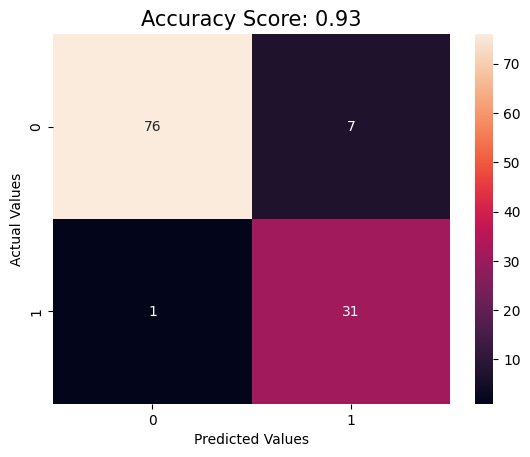

In [ ]:
predictions = dtc.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

## 3.4 Building a Random Forest Model

In [ ]:
rfc = RandomForestClassifier(n_estimators=10, max_depth = 10, random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

## 3.5 Random Forest Model Evaluation

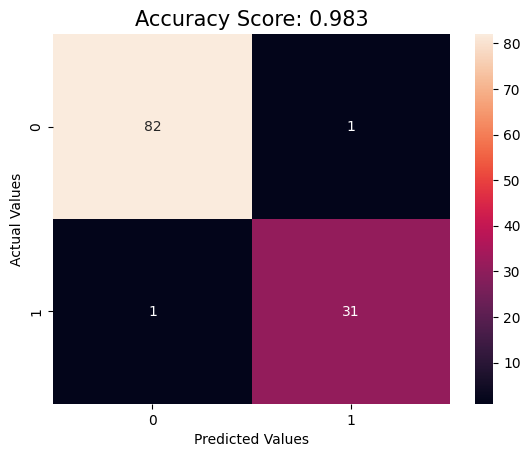

In [ ]:
predictions = rfc.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
print(f'Accuracy of the model is: {accuracy}')
print(f'F1 score of the model is: {f1}')
print(f'Precision of the model is: {precision}')

Accuracy of the model is: 0.9826086956521739
F1 score of the model is: 0.9783509036144578
Precision of the model is: 0.9783509036144578


# 4. Conclusion

* A Random Forest Classifier is the most effective model to predict recurrence of Thyroid cancer using this dataset

* The most important feature in determining this calculation is 'Response', followed by 'Risk'

* The Random Forest model we chose is 98.3% accurate when compared to the test set

* The F1 score of the Random Forest Model is 97.8%

* The precision of the Random Forest Model is 97.8%

* This is a relatively small dataset (383 entries) and I would love to see how the model fairs on a larger slice of data

# Bonus: What Happens if we Drop the Most Important Feature?

I'm going to drop 'Response' from the training and testing sets and see how our model responds to losing the most important feature.

In [ ]:
X_train = X_train.drop('Response', axis=1)

In [ ]:
X_test = X_test.drop('Response', axis=1)

In [ ]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=10, max_depth = 10, random_state=42)

# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

I want to see the permutation importance of features with 'Response' removed.

In [ ]:
from sklearn.inspection import permutation_importance

# Determine permutation importance
perm_importance = permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=0)

# Create a DataFrame for permutation importances
perm_importances = pd.DataFrame(perm_importance.importances, index=X_test.columns).T

# Convert permutation importance results into a DataFrame
perm_importance_df = pd.DataFrame(perm_importance.importances_mean, index=X_test.columns, columns=['Importance'])
perm_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

print("\nPermutation Importances:")
print(perm_importance_df)


Permutation Importances:
                      Importance
Risk                    0.081739
N                       0.027246
Stage                   0.009855
Focality                0.004638
Thyroid Function        0.001159
Hx Radiothreapy         0.000000
Hx Smoking             -0.000580
Smoking                -0.000580
M                      -0.000870
Pathology              -0.002319
T                      -0.004348
Age                    -0.007246
Physical Examination   -0.008696
Gender                 -0.009855
Adenopathy             -0.016232


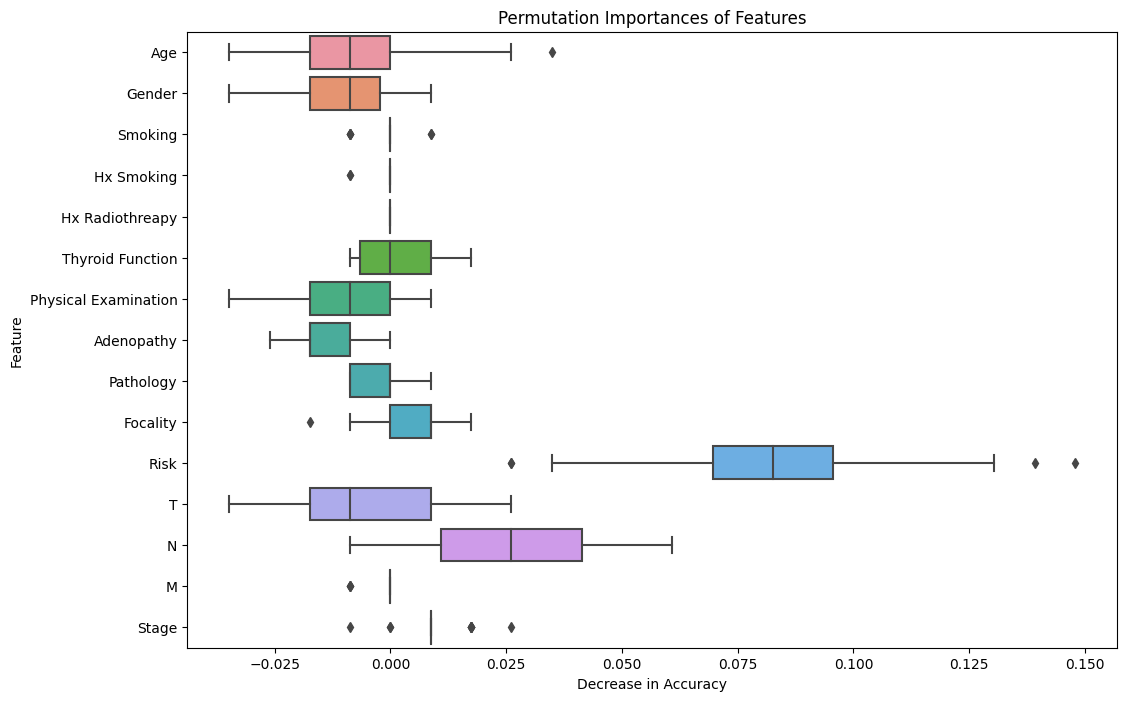

In [ ]:
# Plotting the permutation importance using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=perm_importances, orient='h')
plt.title('Permutation Importances of Features')
plt.xlabel('Decrease in Accuracy')
plt.ylabel('Feature')
plt.show()

I can see now that risk is the most important feature. Note that none of these features have close to the same effect on decrease in accuracy that 'Response' had earlier.

I'll fit a random forest model to the adjusted training sets.

In [ ]:
rfc = RandomForestClassifier(n_estimators=10, max_depth = 3, random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

I'll evaluate the accuracy of the model visualized again in a confusion matrix.

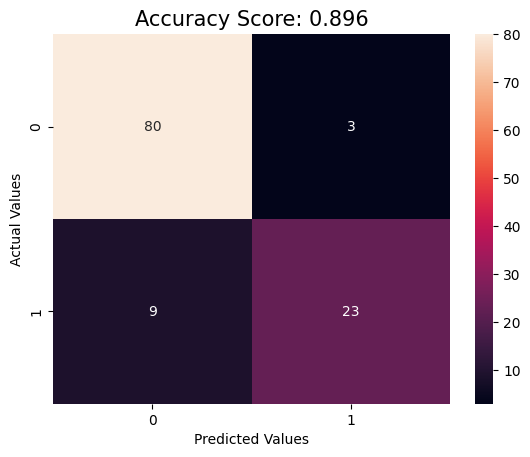

In [ ]:
predictions = rfc.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
print(f'Accuracy of the model is: {accuracy}')
print(f'F1 score of the model is: {f1}')
print(f'Precision of the model is: {precision}')

Accuracy of the model is: 0.8956521739130435
F1 score of the model is: 0.8616680032076984
Precision of the model is: 0.8917458945548833


The accuracy of the model drops (expectedly) but at 89.6% this is still a respectable model. We could somewhat reasonably predict the recurrence of thyroid cancer in absence of knowing the response to cancer treatment.